In [1]:
print("Shree Ram")

Shree Ram


In [8]:
## Reference: https://github.com/krishnaik06/EDA1/blob/master/EDA.ipynb

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### How Many Missing Values are present in data set

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.shape

(891, 12)

In [15]:
177/891

0.19865319865319866

* 77% data of Cabin feature has null values
* approx 20% of age column has null values

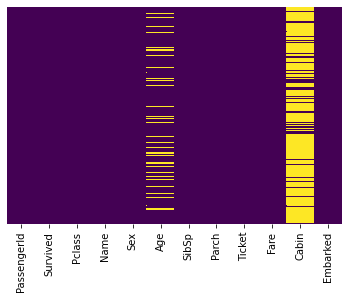

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

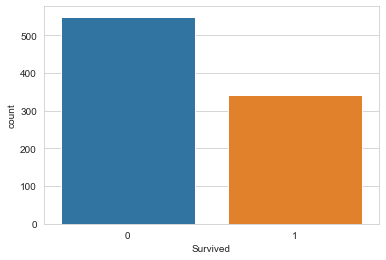

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

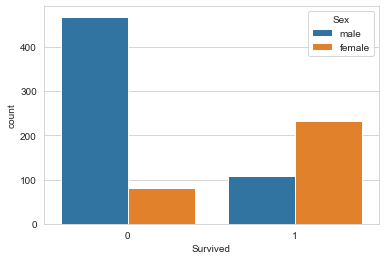

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

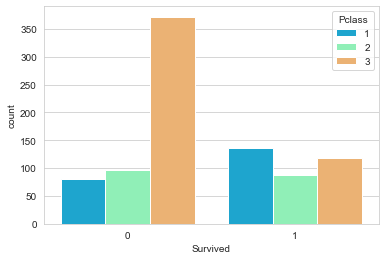

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

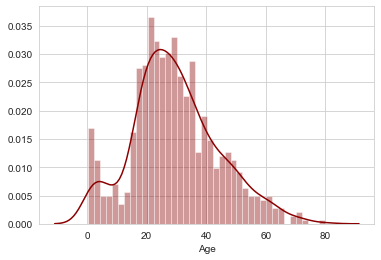

In [22]:
sns.distplot(df['Age'].dropna(),kde=True,color='darkred',bins=40)

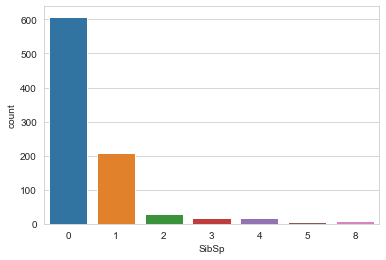

In [23]:
sns.countplot(x='SibSp',data=df)

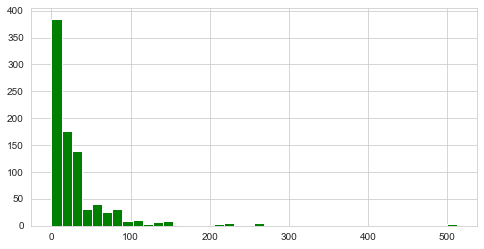

In [24]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [29]:
# import cufflinks as cf
# cf.go_offline()

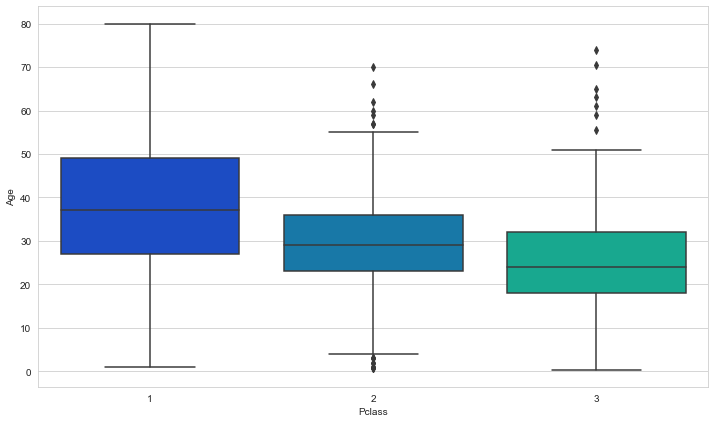

In [32]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [33]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [34]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [54]:
# https://datatofish.com/rows-with-nan-pandas-dataframe/
df['Embarked'].fillna("Unknown",inplace=True)

In [37]:
df.drop(["Cabin"],axis=1,inplace=True)

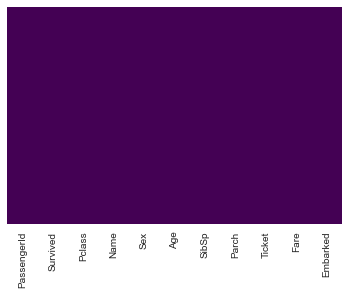

In [55]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [58]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S,Unknown
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [59]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [60]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [62]:


df = pd.concat([df,sex,embark],axis=1)



In [63]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Unknown
0,1,0,3,22.0,1,0,7.2500,1,0,1,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0


In [65]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'], test_size=0.30,random_state=101)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\ravia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
predictions = logmodel.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix


accuracy=confusion_matrix(y_test,predictions)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7761194029850746

In [72]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.65      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268

